In [1]:
options(warn = -1, verbose=FALSE)
#!/usr/bin/env Rscript 
library(dplyr)
library(httr)
library(cowplot)
library(unixtools)
library(repr)
library(tidygraph)
library(ggraph)
library(geojsonio)
set_config(config(ssl_verifypeer = 0L))
ulimit::memory_limit(100000)
set.tempdir("/datastore/lucy/tmp/")
setwd("/datastore/lucy/CosMx")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘tidygraph’


The following object is masked from ‘package:stats’:

    filter


Loading required package: ggplot2

Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson


Attaching package: ‘geojsonio’


The following object is masked from ‘package:base’:

    pretty




soft  hard 
1e+05   Inf

In [2]:
source("./R/utils.R")
start_upR(TRUE)
source("./R/TissueSegFunctions.R")
library(Matrix)

In [3]:
# now let us read in and assimilate the results
diffused_mat_files_list<-list.files("./cache/tissueSegmentation/", 
    pattern = ".*_F0.*.RDS", 
    recursive = TRUE,
    full.names = TRUE)

In [4]:
diffused_mat_files_list %>% length

[1] 53

In [6]:
diffused_mat_files_list

[1] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5654_399G0_32G77_F001.RDS"
 [2] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5654_399G0_32G77_F002.RDS"
 [3] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5654_399G0_32G77_F003.RDS"
 [4] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5654_399G0_32G77_F004.RDS"
 [5] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5654_399G0_32G77_F005.RDS"
 [6] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5654_399G0_32G77_F006.RDS"
 [7] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5654_399G0_32G77_F007.RDS"
 [8] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5654_399G0_32G77_F008.RDS"
 [9] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5654_399G0_32G77_F009.RDS"
[10] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5654_399G0_32G77_F010.RDS"
[11] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5654_399G0_32G77_F011.RDS"
[12] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5654_399G0_32G77_F012.RDS"
[13] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5654_399G0_32G77_F013.RDS"
[14] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5654_399G0_32G77_F014.RDS"
[15] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5654_399G0_32G77_F017.RDS"
[16] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5654_399G0_32G77_F018.RDS"
[17] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5654_399G0_32G77_F021.RDS"
[18] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5654_399G0_32G77_F022.RDS"
[19] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5654_399G0_32G77_F023.RDS"
[20] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G2697_G1532_F001.RDS"
[21] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G2697_G1532_F002.RDS"
[22] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G2697_G1532_F003.RDS"
[23] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G2697_G1532_F004.RDS"
[24] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G2697_G1532_F006.RDS"
[25] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G2697_G1532_F007.RDS"
[26] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G2697_G1532_F008.RDS"
[27] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G2697_G1532_F009.RDS"
[28] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G2697_G1532_F010.RDS"
[29] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G2697_G1532_F011.RDS"
[30] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G2697_G1532_F012.RDS"
[31] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G7G72_G22G5_F001.RDS"
[32] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G7G72_G22G5_F002.RDS"
[33] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G7G72_G22G5_F003.RDS"
[34] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G7G72_G22G5_F004.RDS"
[35] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G7G72_G22G5_F005.RDS"
[36] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G7G72_G22G5_F009.RDS"
[37] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G7G72_G22G5_F010.RDS"
[38] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G7G72_G22G5_F011.RDS"
[39] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G7G72_G22G5_F012.RDS"
[40] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G7G72_G22G5_F013.RDS"
[41] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G7G72_G22G5_F014.RDS"
[42] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G7G72_G22G5_F015.RDS"
[43] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G7G72_G22G5_F016.RDS"
[44] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G7G72_G22G5_F017.RDS"
[45] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G7G72_G22G5_F018.RDS"
[46] "./cache/tissueSegmentation//voronoi

In [5]:
head(diffused_mat_files_list)

[1] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5654_399G0_32G77_F001.RDS"
[2] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5654_399G0_32G77_F002.RDS"
[3] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5654_399G0_32G77_F003.RDS"
[4] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5654_399G0_32G77_F004.RDS"
[5] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5654_399G0_32G77_F005.RDS"
[6] "./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5654_399G0_32G77_F006.RDS"

+ let us check if any of the cells were prune because they were isolated

In [9]:
obj_tmp<-readRDS('./cache/tissueSegmentation//voronoiObj/diffused_mat_Run5666_G2697_G1532_F003.RDS')

In [10]:
names(obj_tmp)

[1] "neighbors"           "neighbors_collapsed" "k_input"            
[4] "counts"              "metadata"            "metadata_small"     
[7] "counts_raw"

In [11]:
head(obj_tmp$metadata)

,cellID,cell,SampleFOV,SampleID,FOV,area_um,radius_um,cell_center_x,cell_center_y,pxsize,tileID,polygon_area,region,nCounts,cell_centroid,shape,polygon_centroid,polygon
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<POINT>,<MULTIPOLYGON>,<POINT>,<POLYGON>
1,C1_Run5666_G2697_G1532_F003,1,Run5666_G2697_G1532_F003,Run5666_G2697_G1532,F003,23.18616,2.716686,15655.11,4825.613,0.168,C1_Run5666_G2697_G1532_F003,85.99166,tissue,40,POINT (15655.11 4825.613),MULTIPOLYGON (((15656.77 48...,POINT (15652.42 4824.642),POLYGON ((15646.39 4826.308...
2,C3_Run5666_G2697_G1532_F003,3,Run5666_G2697_G1532_F003,Run5666_G2697_G1532,F003,12.67008,2.008236,15660.62,4820.947,0.168,C3_Run5666_G2697_G1532_F003,10.96564,tissue,15,POINT (15660.62 4820.947),MULTIPOLYGON (((15657.31 48...,POINT (15659.46 4821.521),"POLYGON ((15655.7 4820.72, ..."
3,C4_Run5666_G2697_G1532_F003,4,Run5666_G2697_G1532_F003,Run5666_G2697_G1532,F003,17.16169,2.337249,15655.13,4831.146,0.168,C4_Run5666_G2697_G1532_F003,68.34137,tissue,47,POINT (15655.13 4831.146),MULTIPOLYGON (((15653.18 48...,POINT (15655.53 4832.254),POLYGON ((15649.36 4828.399...
4,C5_Run5666_G2697_G1532_F003,5,Run5666_G2697_G1532_F003,Run5666_G2697_G1532,F003,21.15862,2.595187,15646.39,4839.049,0.168,C5_Run5666_G2697_G1532_F003,20.72410,tissue,22,POINT (15646.39 4839.049),MULTIPOLYGON (((15646.14 48...,POINT (15647.92 4840.122),POLYGON ((15646.39 4845.346...
5,C6_Run5666_G2697_G1532_F003,6,Run5666_G2697_G1532_F003,Run5666_G2697_G1532,F003,40.05969,3.570910,15652.28,4843.126,0.168,C6_Run5666_G2697_G1532_F003,86.14794,tissue,96,POINT (15652.28 4843.126),MULTIPOLYGON (((15650.89 48...,POINT (15652.59 4843.021),"POLYGON ((15650.97 4838.73,..."
6,C7_Run5666_G2697_G1532_F003,7,Run5666_G2697_G1532_F003,Run5666_G2697_G1532,F003,16.78174,2.311232,15665.75,4822.460,0.168,C7_Run5666_G2697_G1532_F003,36.66706,tissue,12,POINT (15665.75 4822.46),MULTIPOLYGON (((15664.33 48...,POINT (15666.71 4823.471),"POLYGON ((15663.21 4821.63,..."


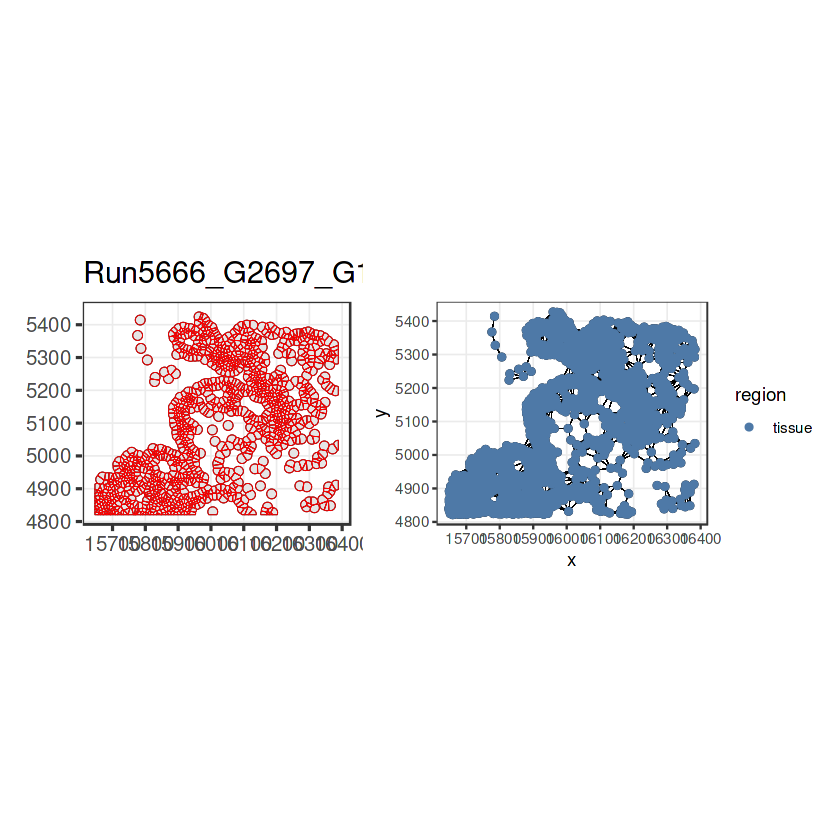

In [12]:
coords_cells<-obj_tmp$metadata %>% 
        st_sf %>% 
        st_set_geometry("polygon_centroid") %>% 
        st_coordinates("polygon_centroid") %>% 
        as.data.frame %>% 
        as.matrix
    # make a graph from the adj matrix
    graph_adj<-igraph::graph_from_adjacency_matrix(obj_tmp$neighbors)
    # conver the graph into tidygraph obj
    tidy_graph<-tidygraph::as_tbl_graph(graph_adj)
    p<-ggraph::ggraph(tidy_graph, layout = coords_cells) +
        ggraph::geom_node_point() +
        ggraph::geom_edge_link(edge_width = 0.1) + 
        geom_sf(
            data = obj_tmp$metadata, 
            aes(geometry = polygon_centroid, color = region)
        ) + 
        scale_color_tableau() +
        theme_bw() + 
        NULL
        
        p_allcells<-ggplot(data.frame(obj_tmp$metadata)) +
            geom_sf(aes(geometry = polygon), color = "black") + 
            geom_sf(data = obj_tmp$metadata_deleted_cells, aes(geometry = polygon), color = "red", fill = NA) +
            ggtitle(obj_tmp$metadata$SampleFOV[1])
        
        p_allcells | p

In [13]:
fig.size(5, 10)
furrr::future_map(diffused_mat_files_list, function(.x){
    obj_tmp<-readRDS(.x)
    ncells_deleted<-obj_tmp$metadata_deleted_cells %>% nrow
    if (length(intersect(obj_tmp$metadata_deleted_cells$cellID, obj_tmp$metadata$cellID)) > 0)
        message("The deleted cells are still in the metadata - check!")
    if (!is.null(ncells_deleted)){
    coords_cells<-obj_tmp$metadata %>% 
        st_sf %>% 
        st_set_geometry("polygon_centroid") %>% 
        st_coordinates("polygon_centroid") %>% 
        as.data.frame %>% 
        as.matrix
    # make a graph from the adj matrix
    graph_adj<-igraph::graph_from_adjacency_matrix(obj_tmp$neighbors)
    # conver the graph into tidygraph obj
    tidy_graph<-tidygraph::as_tbl_graph(graph_adj)
    p<-ggraph::ggraph(tidy_graph, layout = coords_cells) +
        ggraph::geom_node_point() +
        ggraph::geom_edge_link(edge_width = 0.1) + 
        geom_sf(
            data = obj_tmp$metadata, 
            aes(geometry = polygon_centroid, color = region)
        ) + 
        scale_color_tableau() +
        theme_bw() + 
        NULL
        
        p_allcells<-ggplot(data.frame(obj_tmp$metadata)) +
            geom_sf(aes(geometry = polygon), color = "black") + 
            geom_sf(data = obj_tmp$metadata_deleted_cells, aes(geometry = polygon), color = "red", fill = NA) +
            ggtitle(obj_tmp$metadata$SampleFOV[1])
        
        p_allcells | p
    }
}, .options = furrr_options(seed = TRUE))

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
NULL

[[12]]
NULL

[[13]]
NULL

[[14]]
NULL

[[15]]
NULL

[[16]]
NULL

[[17]]
NULL

[[18]]
NULL

[[19]]
NULL

[[20]]
NULL

[[21]]
NULL

[[22]]
NULL

[[23]]
NULL

[[24]]
NULL

[[25]]
NULL

[[26]]
NULL

[[27]]
NULL

[[28]]
NULL

[[29]]
NULL

[[30]]
NULL

[[31]]
NULL

[[32]]
NULL

[[33]]
NULL

[[34]]
NULL

[[35]]
NULL

[[36]]
NULL

[[37]]
NULL

[[38]]
NULL

[[39]]
NULL

[[40]]
NULL

[[41]]
NULL

[[42]]
NULL

[[43]]
NULL

[[44]]
NULL

[[45]]
NULL

[[46]]
NULL

[[47]]
NULL

[[48]]
NULL

[[49]]
NULL

[[50]]
NULL

[[51]]
NULL

[[52]]
NULL

[[53]]
NULL

In [14]:
gene_panel<-furrr::future_map(diffused_mat_files_list, function(.x){
    library(Matrix)
    res<-rownames(readRDS(.x)$counts_raw)
    return(res)
    }, .options = furrr_options(seed = TRUE)
) 

In [15]:
length(gene_panel)

[1] 53

In [13]:
gene_panel<-reduce(gene_panel, intersect)

In [14]:
length(unique(gene_panel))

[1] 977

In [15]:
obj_ksweep<-map(1:10, function(k){

    obj_final<-furrr::future_map(as.list(diffused_mat_files_list), function(path_obj_fov){
        tryCatch({
            obj_samplefov<-readRDS(path_obj_fov)
            obj<-list()
            collapsed_counts<-obj_samplefov$counts_raw[gene_panel, ] %*% t(obj_samplefov$neighbors_collapsed[[k]])
            colnames(collapsed_counts)<-colnames(obj_samplefov$counts_raw)
            
            obj$counts<-collapsed_counts
            obj$metadata<-obj_samplefov$metadata
            obj$counts_raw<-obj_samplefov$counts_raw[gene_panel, ]
            # print("here")
            return(obj)
            
        }, error = function(e){
            message(path_obj_fov)
            message(e)
            return(NULL)
        })
        
    }, .options = furrr_options(seed = TRUE))
    # print(obj_final[[1]]$metadata %>% head)
    obj<-list()
    obj$metadata<-map(obj_final, ~ .x$metadata) %>%  bind_rows()
    obj$counts<-map(obj_final, ~.x$counts) %>% reduce(cbind)
    obj$counts_raw<-map(obj_final, ~.x$counts_raw) %>% reduce(cbind)
    saveRDS(obj, paste0("./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_k_", k, ".RDS"))
    # return(obj)
}) 

In [32]:
obj_ksweep<-readRDS(paste0("./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_k_10.RDS"))

In [33]:
dimlist(obj_ksweep)

$metadata
[1] 153485     18

$counts
[1]    977 153485

$counts_raw
[1]    977 153485

In [30]:
unique(obj_ksweep$metadata$SampleFOV)

[1] "Run5654_399G0_32G77_F001" "Run5654_399G0_32G77_F002"
 [3] "Run5654_399G0_32G77_F003" "Run5654_399G0_32G77_F004"
 [5] "Run5654_399G0_32G77_F005" "Run5654_399G0_32G77_F006"
 [7] "Run5654_399G0_32G77_F007" "Run5654_399G0_32G77_F008"
 [9] "Run5654_399G0_32G77_F009" "Run5654_399G0_32G77_F010"
[11] "Run5654_399G0_32G77_F011" "Run5654_399G0_32G77_F012"
[13] "Run5654_399G0_32G77_F013" "Run5654_399G0_32G77_F014"
[15] "Run5654_399G0_32G77_F017" "Run5654_399G0_32G77_F018"
[17] "Run5654_399G0_32G77_F021" "Run5654_399G0_32G77_F022"
[19] "Run5654_399G0_32G77_F023" "Run5666_G2697_G1532_F001"
[21] "Run5666_G2697_G1532_F002" "Run5666_G2697_G1532_F003"
[23] "Run5666_G2697_G1532_F004" "Run5666_G2697_G1532_F006"
[25] "Run5666_G2697_G1532_F007" "Run5666_G2697_G1532_F008"
[27] "Run5666_G2697_G1532_F009" "Run5666_G2697_G1532_F010"
[29] "Run5666_G2697_G1532_F011" "Run5666_G2697_G1532_F012"
[31] "Run5666_G7G72_G22G5_F001" "Run5666_G7G72_G22G5_F002"
[33] "Run5666_G7G72_G22G5_F003" "Run5666_G7G72_G22G5_F004"
[35] "Run5666_G7G72_G22G5_F005" "Run5666_G7G72_G22G5_F009"
[37] "Run5666_G7G72_G22G5_F010" "Run5666_G7G72_G22G5_F011"
[39] "Run5666_G7G72_G22G5_F012" "Run5666_G7G72_G22G5_F013"
[41] "Run5666_G7G72_G22G5_F014" "Run5666_G7G72_G22G5_F015"
[43] "Run5666_G7G72_G22G5_F016" "Run5666_G7G72_G22G5_F017"
[45] "Run5666_G7G72_G22G5_F018" "Run5666_G7G72_G22G5_F019"
[47] "Run5666_G7G72_G22G5_F020" "Run5666_G7G72_G22G5_F021"
[49] "Run5666_G7G72_G22G5_F022" "Run5666_G7G72_G22G5_F023"
[51] "Run5666_G7G72_G22G5_F024" "Run5666_G7G72_G22G5_F025"
[53] "Run5666_G7G72_G22G5_F026"

In [18]:
obj_ksweep$counts_raw[1:5, 1:5]

5 x 5 sparse Matrix of class "dgCMatrix"
     C18_Run5654_399G0_32G77_F001 C26_Run5654_399G0_32G77_F001
AATK                            .                            .
ABL1                            .                            .
ABL2                            .                            .
ACE                             .                            .
ACE2                            .                            .
     C27_Run5654_399G0_32G77_F001 C28_Run5654_399G0_32G77_F001
AATK                            .                            .
ABL1                            .                            .
ABL2                            .                            .
ACE                             .                            .
ACE2                            .                            .
     C29_Run5654_399G0_32G77_F001
AATK                            .
ABL1                            .
ABL2                            .
ACE                             .
ACE2                            .

In [19]:
obj_ksweep$counts[1:5, 1:5]

5 x 5 sparse Matrix of class "dgCMatrix"
     C18_Run5654_399G0_32G77_F001 C26_Run5654_399G0_32G77_F001
AATK                 .                            1.875565e-09
ABL1                 0.0996545254                 9.455226e-07
ABL2                 0.0000421281                 4.288957e-04
ACE                  0.0004265495                 .           
ACE2                 .                            .           
     C27_Run5654_399G0_32G77_F001 C28_Run5654_399G0_32G77_F001
AATK                 1.980336e-07                 3.924482e-09
ABL1                 2.309452e-05                 1.361604e-06
ABL2                 1.547650e-02                 8.405027e-03
ACE                  .                            .           
ACE2                 .                            .           
     C29_Run5654_399G0_32G77_F001
AATK                 .           
ABL1                 9.525879e-04
ABL2                 1.246448e-05
ACE                  2.856479e-05
ACE2                 .           

In [20]:
tail(obj_ksweep$metadata, 2)

,cellID,cell,SampleFOV,SampleID,FOV,area_um,radius_um,cell_center_x,cell_center_y,pxsize,tileID,polygon_area,region,nCounts,cell_centroid,shape,polygon_centroid,polygon
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<POINT>,<MULTIPOLYGON>,<POINT>,<POLYGON>
153484,C11821_Run5666_G7G72_G22G5_F026,11821,Run5666_G7G72_G22G5_F026,Run5666_G7G72_G22G5,F026,21.12526,2.593141,45553.88,-8464.733,0.168,C11821_Run5666_G7G72_G22G5_F026,55.32295,tissue,25,POINT (45553.88 -8464.733),MULTIPOLYGON (((45550.18 -8...,POINT (45553.58 -8464.386),POLYGON ((45548.3 -8464.232...
153485,C12080_Run5666_G7G72_G22G5_F026,12080,Run5666_G7G72_G22G5_F026,Run5666_G7G72_G22G5,F026,18.43537,2.422428,45558.29,-8469.182,0.168,C12080_Run5666_G7G72_G22G5_F026,56.81153,tissue,23,POINT (45558.29 -8469.182),MULTIPOLYGON (((45560.78 -8...,POINT (45558.92 -8470.136),POLYGON ((45554.83 -8468.19...


In [21]:
unique(obj_ksweep$metadata$SampleID) %>% length

[1] 3

In [22]:
obj_ksweep$metadata<-obj_ksweep$metadata %>% 
    dplyr::mutate(cellID = tileID)

In [23]:
all(obj_ksweep$metadata$tileID == colnames(obj_ksweep$counts))

[1] TRUE

# harmonize

In [25]:
sample_paths_preH<-list.files(
    "./cache/tissueSegmentation/voronoiObj", 
    pattern = "diffused_mat_sample.*.RDS", 
    recursive = TRUE,
    full.names = TRUE
)

In [26]:
sample_paths_preH

[1] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_k_1.RDS" 
 [2] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_k_10.RDS"
 [3] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_k_2.RDS" 
 [4] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_k_3.RDS" 
 [5] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_k_4.RDS" 
 [6] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_k_5.RDS" 
 [7] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_k_6.RDS" 
 [8] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_k_7.RDS" 
 [9] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_k_8.RDS" 
[10] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_k_9.RDS"

In [27]:
gsub(".*_k_(.*?).RDS", "\\1", sample_paths_preH) %>% as.numeric

[1]  1 10  2  3  4  5  6  7  8  9

In [28]:
dimlist(obj_ksweep)

$metadata
[1] 153485     18

$counts
[1]    977 153485

$counts_raw
[1]    977 153485

In [30]:
map(sample_paths_preH, function(fpath){
    
    k<-gsub(".*_k_(.*?).RDS", "\\1", fpath) %>% as.numeric
    obj_k_path<- paste0(fpath)
    obj_k_path
    })

[[1]]
[1] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_k_1.RDS"

[[2]]
[1] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_k_10.RDS"

[[3]]
[1] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_k_2.RDS"

[[4]]
[1] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_k_3.RDS"

[[5]]
[1] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_k_4.RDS"

[[6]]
[1] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_k_5.RDS"

[[7]]
[1] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_k_6.RDS"

[[8]]
[1] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_k_7.RDS"

[[9]]
[1] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_k_8.RDS"

[[10]]
[1] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_k_9.RDS"

In [33]:
dimred_and_cluster<- function (clusterobj, do_harmony = FALSE, ...) 
{
    input_var <- list(...)
    if (is.null(input_var[["sigma"]])) 
        message("You did not specify sigma for Harmony")
    else sigma_harmony <- input_var[["sigma"]]
    if (is.null(input_var[["theta"]])) 
        message("You did not specify theta for Harmony")
    else theta_harmony <- input_var[["theta"]]
    if (is.null(input_var[["vars_use"]])) 
        message("You did not specify batch var for Harmony")
    else batch_harmony <- input_var[["vars_use"]]
    wts <- clusterobj$metadata %>% with(table(as.factor(region))) %>% 
        prop.table %>% as.data.frame %>% rename(region = Var1) %>% 
        mutate(wts = 1/Freq) %>% mutate(region = as.character(region))
    clusterobj$metadata <- clusterobj$metadata %>% left_join(wts %>% 
        dplyr::select(region, wts), by = "region")
    head(clusterobj$metadata)
    if (do_harmony) {
        norm_value <- median(colSums(clusterobj$counts))
        objH <- QC_harmony_pipeline(clusterobj, ngenes_threshold = 1, 
            ncounts_threshold = 1, norm_value, ...)
        objH$sigma_harmony <- sigma_harmony
        objH$vars_use <- batch_harmony
        objH$theta_harmony <- theta_harmony
        clusterobj <- objH
    }
    else {
        set.seed(9)
        print("Clustering on SNN")
        system.time({
            clusterobj$umap$clusters <- RunModularityClustering(clusterobj$umap$fgraph, 
                resolution = c(0.5, 0.7, 1), n_cores = 10, 
                print.output = FALSE)
        })
    }
    return(clusterobj)
}

Harmony 1/12

Harmony 2/12

Harmony 3/12

Harmony 4/12

Harmony 5/12

Harmony 6/12

Harmony 7/12

Harmony 8/12

Harmony 9/12

Harmony 10/12

Harmony 11/12

Harmony 12/12

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`


[1] "./cache/tissueSegmentation/voronoiObj//diffused_mat_sample_harmonized_k_1.RDS"


Harmony 1/12

Harmony 2/12

Harmony 3/12

Harmony 4/12

Harmony 5/12

Harmony 6/12

Harmony 7/12

Harmony 8/12

Harmony 9/12

Harmony 10/12

Harmony 11/12

Harmony 12/12

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`


[1] "./cache/tissueSegmentation/voronoiObj//diffused_mat_sample_harmonized_k_10.RDS"


Harmony 1/12

Harmony 2/12

Harmony 3/12

Harmony 4/12

Harmony 5/12

Harmony 6/12

Harmony 7/12

Harmony 8/12

Harmony 9/12

Harmony 10/12

Harmony 11/12

Harmony 12/12



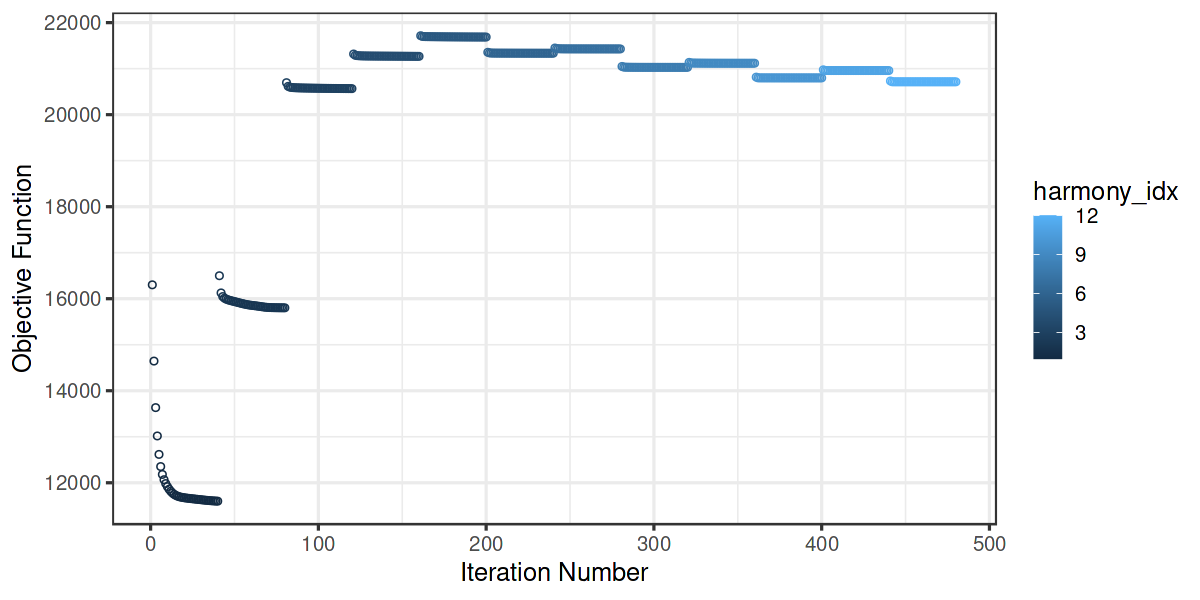

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`


[1] "./cache/tissueSegmentation/voronoiObj//diffused_mat_sample_harmonized_k_2.RDS"


Harmony 1/12

Harmony 2/12

Harmony 3/12

Harmony 4/12

Harmony 5/12

Harmony 6/12

Harmony 7/12

Harmony 8/12

Harmony 9/12

Harmony 10/12

Harmony 11/12

Harmony 12/12



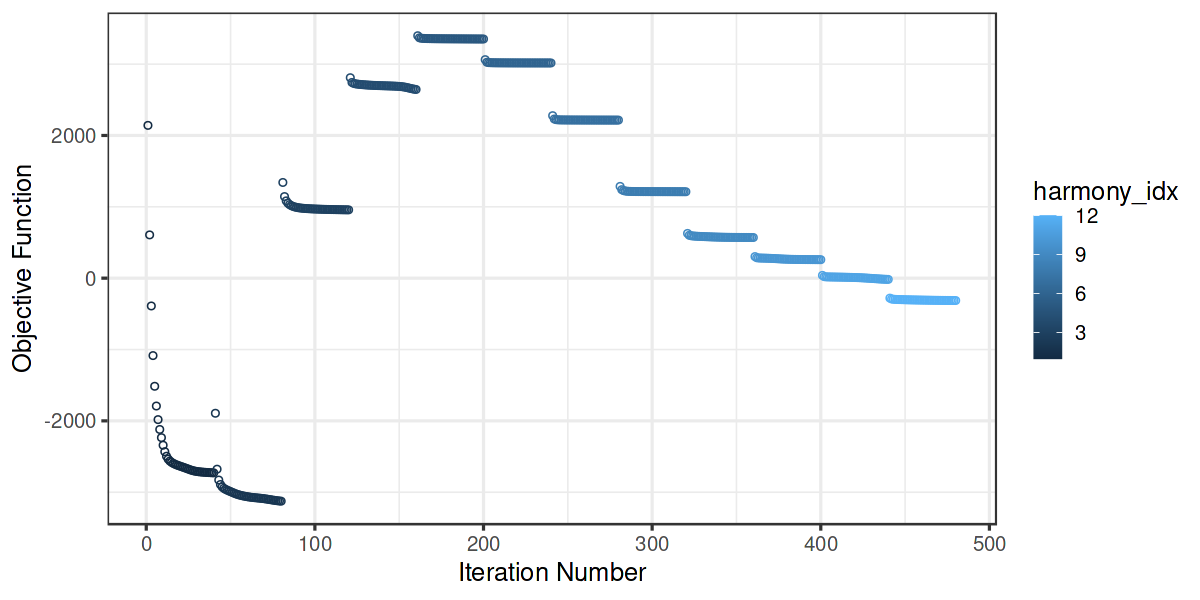

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`


[1] "./cache/tissueSegmentation/voronoiObj//diffused_mat_sample_harmonized_k_3.RDS"


Harmony 1/12

Harmony 2/12

Harmony 3/12

Harmony 4/12

Harmony 5/12

Harmony 6/12

Harmony 7/12

Harmony 8/12

Harmony 9/12

Harmony 10/12

Harmony 11/12



In [ ]:
map(sample_paths_preH, function(fpath){
    k<-gsub(".*_k_(.*?).RDS", "\\1", fpath) %>% as.numeric
    obj_k_path<- paste0(fpath)
obj_k<-readRDS(obj_k_path)
obj_k$metadata<-obj_k$metadata %>% 
    as.data.frame %>%
    dplyr::mutate(cellID = tileID)
objH<-dimred_and_cluster(
    obj_k, 
    do_harmony = TRUE, 
    vars_use = c("SampleID", "SampleFOV"), 
    resolution_clustering = c(0.5, 0.7, 1),
    theta = c(0, 0),
    sigma = 0.2, 
    max.iter.harmony = 12,
    max.iter.cluster = 40,
    do_cluster_after = TRUE,
    return_object = TRUE,
    do_umap_after = TRUE,
    do_umap_before = TRUE,
    clustering_ncores = 8

)
file_path_save<-"./cache/tissueSegmentation/voronoiObj/"
file_path_final<-file.path(file_path_save, paste0("diffused_mat_sample_harmonized_k_", k, ".RDS"))
print(file_path_final)
saveRDS(objH, file_path_final)
    })

# check

In [51]:
sample_paths_postH<-list.files(
    "./cache/tissueSegmentation/voronoiObj", 
    pattern = "diffused_mat_sample_harmonized.*.RDS", 
    recursive = TRUE,
    full.names = TRUE
)

In [52]:
sample_paths_postH

[1] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_harmonized_k_1.RDS" 
 [2] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_harmonized_k_10.RDS"
 [3] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_harmonized_k_2.RDS" 
 [4] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_harmonized_k_3.RDS" 
 [5] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_harmonized_k_4.RDS" 
 [6] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_harmonized_k_5.RDS" 
 [7] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_harmonized_k_6.RDS" 
 [8] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_harmonized_k_7.RDS" 
 [9] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_harmonized_k_8.RDS" 
[10] "./cache/tissueSegmentation/voronoiObj/diffused_mat_sample_harmonized_k_9.RDS"

In [53]:
length(sample_paths_postH)

[1] 10

In [54]:
objH<-readRDS(sample_paths_postH[1])

In [55]:
head(objH$metadata, 2)

,cellID,cell,SampleFOV,SampleID,FOV,area_um,radius_um,cell_center_x,cell_center_y,pxsize,tileID,polygon_area,region,nCounts,cell_centroid,shape,polygon_centroid,polygon,wts
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<POINT>,<MULTIPOLYGON>,<POINT>,<POLYGON>,<dbl>
1,C18_Run5654_399G0_32G77_F001,18,Run5654_399G0_32G77_F001,Run5654_399G0_32G77,F001,20.97153,2.583688,23171.10,-1512.382,0.168,C18_Run5654_399G0_32G77_F001,638.9639,tissue,39,POINT (23171.1 -1512.382),MULTIPOLYGON (((23172.2 -15...,POINT (23172.22 -1512.483),POLYGON ((23175.99 -1498.20...,1
2,C26_Run5654_399G0_32G77_F001,26,Run5654_399G0_32G77_F001,Run5654_399G0_32G77,F001,42.90907,3.695725,23342.02,-1654.621,0.168,C26_Run5654_399G0_32G77_F001,272.8949,tissue,105,POINT (23342.02 -1654.621),MULTIPOLYGON (((23343.97 -1...,POINT (23335.95 -1655.476),POLYGON ((23328.67 -1647.78...,1
